In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
%matplotlib inline

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa'))

In [3]:
import qiskit
provider = qiskit.IBMQ.load_account()
from qiskit_optimization.algorithms import GoemansWilliamsonOptimizer

from helpers import *
from shared.QiskitMaxcut import *
from shared.graph_helper import *

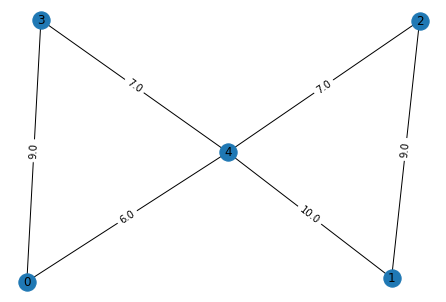

In [4]:
# ---- Define graph and MaxCut ----
filename = "graph_05_06_02_w.txt"
graph = load_nx_graph_from(f"data/{filename}")
opt_max_cut = -get_max_cut(graph.name)
max_cut = Maxcut(graph, opt_max_cut)
max_cut_qubo = max_cut.to_qubo()
max_cut.draw()

In [5]:
optimizer = GoemansWilliamsonOptimizer(5)
result = optimizer.solve(max_cut_qubo)
mean, distribution = max_cut.analyse(result, print_output=True)
max_cut.plot_histogram(distribution, mean)

optimal function value: 35.0
optimal value: [0 1 0 1 0]
status: SUCCESS
Expectation Value: -33.0
Highest Exp.Value: -32 with 50.0 %
Lowest Exp.Value: -35 with 25.0 %
Highest Probability: -32 with 50.0 %
Ratio r: 0.333
Approiximation ratio: 0.943
MSE: 1.667
RMSE: 1.291


In [6]:
BACKEND, EVAL_NUM, MAX_ITER, MAX_P, SHOTS = load_configs()
display_configs()
all_results = {}

Backend = Simulator
EVAL_NUM = 100
MAX_ITER = 100
MAX_P = 4
SHOTS = 1024


In [7]:
from helpers.qaoa_helper import *

In [38]:
qaoa = create_qaoa(optimizer=COBYLA(maxiter=50),reps=1)
result, optimal_parameters = run_qaoa(qaoa, max_cut_qubo)
mean, distribution = max_cut.analyse(result, print_output=True)
print(f"Final Parameters: {optimal_parameters}")

optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Expectation Value: -32.012
Highest Exp.Value: -15 with 0.488 %
Lowest Exp.Value: -35 with 19.531 %
Highest Probability: -32 with 28.613 %
Ratio r: 0.851
Approiximation ratio: 0.915
Final Parameters: [-2.9422297 -3.9853753]


In [40]:
print(f"std: {np.std(list(distribution.values()))}")

std: 0.10553762941787413


In [21]:
print(qaoa.optimal_params)

[-5.83549799 -5.13483492]


In [17]:
max_cut.plot_histogram(distribution, mean)
plt.show()

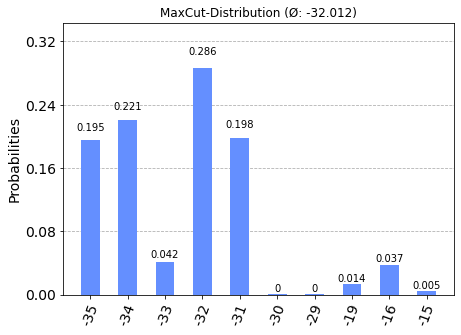

In [39]:
plot_histogram(distribution, title=f"MaxCut-Distribution (Ø: {mean:.3f})")